In [1]:
import pandas as pd
import numpy as np
from time import sleep

In [7]:
colomns=range(10)
learned_features=pd.read_csv('compressed_data.csv',names=colomns)

In [8]:
learned_features=learned_features.values
learned_features.shape
learned_features[0]

array([-396.79171753,  -21.43146896,  -18.77160263,  380.02386475,
        119.07594299,  298.19979858,  597.38604736,   53.28568649,
        245.38861084,   74.91307068])

In [9]:
a=np.genfromtxt('data_for_clustering.csv', delimiter=',')
a=a[:-1]
print(a[1])
x=a[:250*910]
x=x[20*250:]
x=x.reshape(-1,250)
me=np.mean(x,axis=1)
x=(x.T-me).T
x.shape

39963.59


(890, 250)

In [10]:
siny=[]
cosy=[]
k = np.arange(250)
Fs=250
for f in range(1,31):
    siny.append(np.sin(2 * np.pi * f * k / Fs))
    cosy.append(np.cos(2 * np.pi * f * k / Fs))

In [11]:
siny=np.array(siny)
cosy=np.array(cosy)

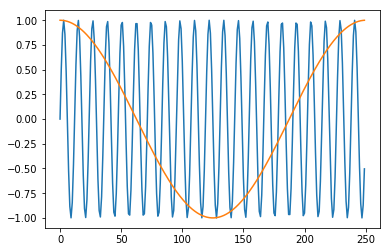

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(250),siny[20],label=1)
plt.plot(range(250),cosy[0],label=2)

In [14]:
sin=[]
cos=[]
for i in range(890):
    sin.append(np.sum(x[i]*siny,axis=1))
    cos.append(np.sum(x[i]*cosy,axis=1))
sin=np.array(sin)
cos=np.array(cos)
sin=pow(sin,2)
cos=pow(cos,2)
fft=np.sqrt(sin+cos)
fft=fft.reshape(890,10,3)
#fft=np.sum(fft,axis=2)
#fft[0]
#fft=np.fft.fft(x)
#fft=fft.T[0:30].T
#fft=fft.reshape(890,10,3)
fft=np.sum(fft,axis=2)
print(fft.shape)

(890, 10)


In [176]:
#batch=100
#learned_features=learned_features[0:100]
#fft=fft[0:100]
print(learned_features[0][0],fft[0][0])
print(learned_features.shape,fft.shape)
from scipy.stats import linregress
#print(learned_features[0].shape)
for i in range(4,30):
    for j in range(20):
        slope, intercept, r_value, p_value, std_err=linregress(learned_features.T[j], fft.T[i])
        if(r_value>0.1 or r_value<-0.1):
            #print(np.corrcoef(learned_features.T[j], fft.T[i]))
            print(r_value,p_value)
            print(i,j)
    #print()
#print(np.corrcoef(learned_features.T[i], fft.T[j]))

-6718.267815358754 7009.554039723988
(890, 20) (890, 30)
0.10201880202703681 0.0023099189532653167
4 5
0.11821591386796765 0.0004090693067854879
5 5
0.1097508354112138 0.001039941441440269
10 9
-0.10596115887990218 0.0015476433226925817
13 12
-0.13262739921578784 7.228425175415324e-05
18 3
0.1296374512465692 0.0001051462890787194
18 17
0.1126392802878227 0.0007617037564040362
26 16


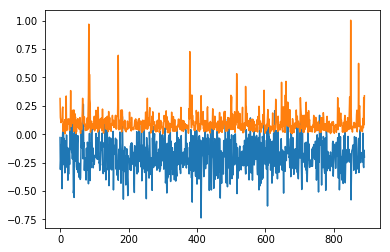

In [146]:
plt.plot(range(890),learned_features.T[1],label=1)
plt.plot(range(890),fft.T[1],label=1)

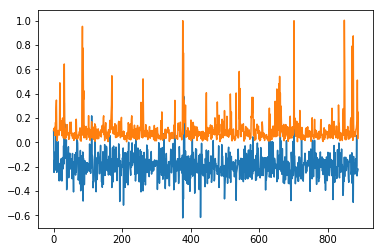

In [147]:
x1=learned_features.T[0]
x2=fft.T[0]
x1=x1/(max(x1)-min(x1))
x2=x2/(max(x2)-min(x2))
plt.plot(range(890),x1,label=1)
plt.plot(range(890),x2,label=1)

In [148]:
k=(np.max(learned_features.T,axis=1)-np.min(learned_features.T,axis=1))
print(k)
learned_features=learned_features/(k.reshape(1,20))
k=(np.max(fft.T,axis=1)-np.min(fft.T,axis=1))
print(k)
fft=fft/(k.reshape(1,30))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [132]:
#%matplotlib widget
#upto=100
#plt.plot(range(upto),fft.T[0][0:upto],label=1)
#plt.plot(range(upto),learned_features.T[0][0:upto],label=1)

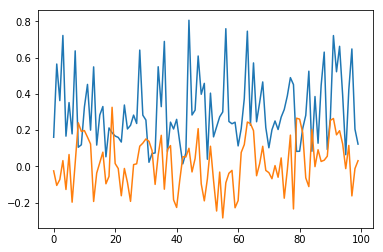

In [48]:
upto=100
for i in [9]:
    for j in [0]:
        #plt.subplot(2,2,j+1)
        plt.plot(range(upto),fft.T[24][0:upto],label=1)
        plt.plot(range(upto),learned_features.T[28][0:upto],label=1)

In [ ]:
#np.corrcoef(fft[0],learned_features[0])[0][1]

In [49]:
#fft=fft.T
#learned_features=learned_features.T
for i in range(1,100):
    if (np.corrcoef(fft[i],learned_features[i])[0][1]>0.5 or np.corrcoef(fft[i],learned_features[i])[0][1]<-0.5):
        print(np.corrcoef(fft[i],learned_features[j])[0][1],end=' , ')
  


0.18062586455376736 , 0.40244858784386417 , 0.38807807533609 , 0.2225162207458453 , 0.4392188100152386 , 0.2629188331110414 , 

In [50]:
#print(np.corrcoef(fft.T,learned_features.T)[0])

In [51]:
fft[0]

array([41016.8100798 , 20931.42886148, 13607.91678796, 22542.20107102,
        8835.57533357,  8364.20133738,  8840.81161161,  6075.42573306,
        4373.70374784,  3986.88007061])

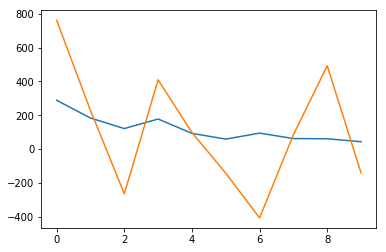

In [19]:
plt.plot(range(10),fft[5]/100,label=1)
plt.plot(range(10),learned_features[5],label=2)

In [ ]:
a=x[0]
fourier = np.fft.fft(a)
n = a.size
freq = np.fft.fftfreq(n, d=1/250)

In [ ]:
#print(a)
#print(fourier)

In [ ]:
freq = np.fft.fftfreq(250, d=1/250)
#freq

In [ ]:
t=range(250)
sine=[]
for i in range(250):
    sine.append(np.sin(2*180*1*i/250))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(250),sine,label=1)
#plt.plot(range(250),fourier,label=2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


Fs = 250
f = 5
sample = 250
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

In [98]:
a=[1,2,3,4]
sin3=[]
cos3=[]
for i in range(4):
    sin3.append(np.sum(a[i]*siny))
    cos3.append(np.sum(a[i]*cosy))
sin3=np.array(sin3)
cos3=np.array(cos3)
sin3=pow(sin3,2)
cos3=pow(cos3,2)
fft3=np.sqrt(sin3+cos3)

In [102]:
fourier = np.fft.fft(x[0])
fourier.shape

(250,)

In [104]:
print(type(k))

<class 'numpy.ndarray'>
